In [43]:
# #Instalaccion:
# 1. Python
# 2. VS code
# 3. Python - Extention VS Code
# 4. Jupiter Notebook
# 5. curl https://bootstrap.pypa.io/get-pip.py -o get-pip.py
# 6. python get-pip.py
# 7. pip install pandas
# 8. pip install seaborn
# 9. pip install SQLALchemy
# 10. pip install pandasqldfdf

#Pandas para leer la data
import pandas as pd

#PandaSQL para consultas
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

import seaborn as sns


import matplotlib.pyplot as plt

In [41]:
#Se lee el documento y se imprime
df = pd.read_csv("Sample - Superstore.csv", delimiter=",", encoding="unicode_escape")
print(df)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

In [24]:
#Verifico la info del data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [25]:
#Aquí he cambiado algunos nombres de columnas por si una vez trabajados donde se deban cargar, los parametros de entrada sean con este formato
df = df.rename(columns={"Row ID": "rowID","Order ID": "orderID", "Customer Name": "customerName"})
df.head()

,rowID,orderID,Order Date,Ship Date,Ship Mode,Customer ID,customerName,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [26]:
#Practique el casteo de valores
df["Postal Code"] = df["Postal Code"].astype(str)
df.head()

,rowID,orderID,Order Date,Ship Date,Ship Mode,Customer ID,customerName,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [27]:
#Formatee el aspecto de las sales sin cambiar su valor
df["Sales_formatted"] = df["Sales"].map("${:,.2f}".format)
df.head()
    

,rowID,orderID,Order Date,Ship Date,Ship Mode,Customer ID,customerName,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sales_formatted
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,$261.96
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,$731.94
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,$14.62
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,$957.58
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,$22.37


In [ ]:
#Sales for region me devuelve la suma de la ventas por cada region

query = """SELECT Region,
    SUM(Sales) as Total_Sales
from df
GROUP BY Sales
ORDER BY Total_Sales DESC"""

sales_region = pysqldf(query)
sales_region


,Region,Total_Sales
0,South,22638.480
1,Central,17499.950
2,West,13999.960
3,East,11199.968
4,Central,11199.840
...,...,...
5820,Central,0.876
5821,East,0.852
5822,Central,0.836
5823,Central,0.556


In [ ]:
#Ventas realizadas por ID y NOMBRE de customer, replicando algún analisis con proveedores
query2 = """
SELECT
    [Customer ID],
    [Customer Name],
    SUM(Sales) AS Total_Sales_Customer
FROM df
GROUP BY
    [Customer ID],
    [Customer Name]
    ORDER BY Total_Sales_Customer DESC"""


sales_customer = pysqldf(query2)
sales_customer

,Customer ID,Customer Name,Total_Sales_Customer
0,SM-20320,Sean Miller,25043.050
1,TC-20980,Tamara Chand,19052.218
2,RB-19360,Raymond Buch,15117.339
3,TA-21385,Tom Ashbrook,14595.620
4,AB-10105,Adrian Barton,14473.571
...,...,...,...
788,RS-19870,Roy Skaria,22.328
789,MG-18205,Mitch Gastineau,16.739
790,CJ-11875,Carl Jackson,16.520
791,LD-16855,Lela Donovan,5.304


In [48]:
#Se verifica la ventas realizadas por clientes en el ulitmo cuatrimestre(septiembre, octubre, noviembre, diciembre) del año 2017

#Primero verifico que el valor de order date sea datetime
df["Order Date"] = pd.to_datetime(df["Order Date"])

#Query de la consulta lo mas importante aqui es el rango que se establezca y delimitar dentro de este
query3 = """
SELECT
    [Customer ID],
    [Customer Name],
    SUM(Sales) AS total_sales_customer_Q4_2017
FROM df
WHERE [Order Date] BETWEEN '2017-09-01' AND '2017-12-31'
GROUP BY
    [Customer ID],
    [Customer Name]
ORDER BY total_sales_customer_Q4_2017 DESC
"""

sales_customer_Q4_2017 = pysqldf(query3)
sales_customer_Q4_2017


,Customer ID,Customer Name,total_sales_customer_Q4_2017
0,TA-21385,Tom Ashbrook,13716.458
1,HL-15040,Hunter Lopez,10522.550
2,GT-14635,Grant Thornton,8167.420
3,SV-20365,Seth Vernon,7359.918
4,TS-21370,Todd Sumrall,6492.314
...,...,...,...
526,GD-14590,Giulietta Dortch,3.856
527,JM-15580,Jill Matthias,3.024
528,SC-20800,Stuart Calhoun,2.368
529,EB-13870,Emily Burns,1.908


In [50]:
top10_customers = sales_customer_Q4_2017.head(10)


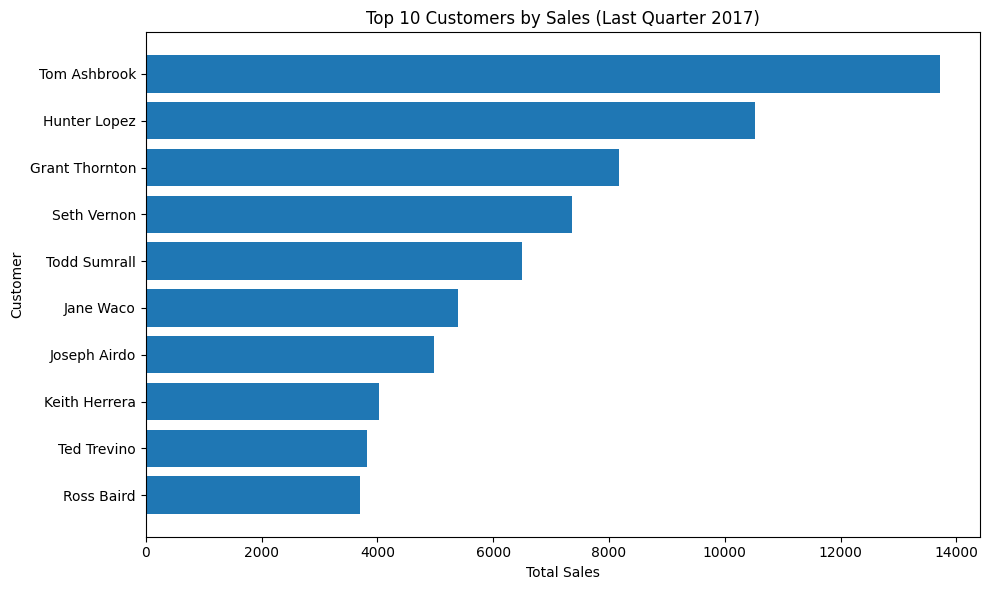

In [54]:

plt.figure(figsize=(10, 6))
plt.barh(
    top10_customers["Customer Name"],
    top10_customers["total_sales_customer_Q4_2017"]
)

plt.xlabel("Total Sales")
plt.ylabel("Customer")
plt.title("Top 10 Customers by Sales (Last Quarter 2017)")

plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()
